# Steps

- scale factors
- log-log scatter plot

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import statsmodels.formula.api as smf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "..\\data\\"
data = pd.read_csv(f"{data_dir}20241025agg_smart_chr.csv")
data.head(3)

,year,Locationdesc,Sample_Size,Data_value,Data_value_unit,Data_value_type,cbsacode,adult_population,adult_population18_65,population,total_65_and_older,total_adult_obesity,total_adult_smoking,total_below_18_years_of_age,total_children_in_poverty,total_children_in_single-parent_households,total_excessive_drinking,total_female,total_homicides,total_mental_health_providers,total_motor_vehicle_crash_deaths,total_not_proficient_in_english,total_physical_inactivity,total_poor_mental_health_days,total_poor_or_fair_health,total_poor_physical_health_days,total_premature_death,total_primary_care_physicians,total_rural,total_sexually_transmitted_infections,total_uninsured_adults,total_violent_crime
0,2011.0,"Aberdeen, SD Micropolitan Statistical Area",88,16.75,%,Crude Prevalence,10100,30312.839000,23626.885,39139.0,6685.954000,8924.320295,5720.877944,8826.161000,1145.953026,2023.366088,6192.435272,20078.096000,0.70408,inf,5.107186,580.270000,8501.832617,3026.186667,3780.488759,3887.666667,2055.415364,529.733192,14460.996000,79.103388,3323.081065,0.000000
1,2014.0,"Aberdeen, SD Micropolitan Statistical Area",105,19.36,%,Crude Prevalence,10100,31817.000001,25031.000,41357.0,6786.000000,10033.372000,5432.763000,9539.999999,1193.423000,2255.656177,6567.681000,21078.992158,0.00000,0.000000,4.168915,236.587419,8718.757000,3258.536667,3503.131000,3846.566667,2269.765419,429.563140,14811.124251,133.732192,3382.513897,68.681027
2,2015.0,"Aberdeen, SD Micropolitan Statistical Area",84,14.29,%,Crude Prevalence,10100,32122.000001,25260.000,41948.0,6862.000001,9547.014000,5485.478000,9825.999999,1239.094000,2401.510485,6630.726000,21341.000001,0.00000,129.454111,4.027708,360.664074,8141.064000,3307.086667,3537.146000,3901.676667,2239.679700,510.165404,14992.533711,116.714265,3319.492686,76.653985


# Scaling

In [3]:
# data = data[data.population >= 600000]

In [4]:
# factors selection starts from 'total_adult_obesity' column
factors = data.columns[data.columns.get_loc('total_adult_obesity'):].tolist()

for factor in factors:
    print(f"\nAnalyzing factor: {factor}")

    data['Data_value'] = data['Data_value'].replace([0, np.inf, -np.inf], np.nan)
    data[factor] = data[factor].replace([0, np.inf, -np.inf], np.nan)
    data['population'] = data['population'].replace([0, np.inf, -np.inf], np.nan)

    clean_data = data.dropna(subset=['Data_value', factor, 'population'])

    clean_data['log_Data_value'] = np.log(clean_data['Data_value'] / 100 * clean_data['population'])
    clean_data['log_factor'] = np.log(clean_data[factor])
    clean_data['log_population'] = np.log(clean_data['population'])

    if clean_data.empty:
        print(f"Skipping {factor} due to insufficient data.")
        continue

    ols_model = smf.ols(formula='log_Data_value ~ log_population + log_factor', data=clean_data).fit()
    print(ols_model.summary())



Analyzing factor: total_adult_obesity
                            OLS Regression Results                            
Dep. Variable:         log_Data_value   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.423e+04
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:17:08   Log-Likelihood:                 412.18
No. Observations:                1605   AIC:                            -818.4
Df Residuals:                    1602   BIC:                            -802.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Inter

C:\Users\hongy\AppData\Local\Temp\ipykernel_16968\1177774570.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['log_Data_value'] = np.log(clean_data['Data_value'] / 100 * clean_data['population'])
C:\Users\hongy\AppData\Local\Temp\ipykernel_16968\1177774570.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['log_factor'] = np.log(clean_data[factor])
C:\Users\hongy\AppData\Local\Temp\ipykernel_16968\1177774570.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of

# Log-Log Scatter Plot

In [5]:
data.head(3)

,year,Locationdesc,Sample_Size,Data_value,Data_value_unit,Data_value_type,cbsacode,adult_population,adult_population18_65,population,total_65_and_older,total_adult_obesity,total_adult_smoking,total_below_18_years_of_age,total_children_in_poverty,total_children_in_single-parent_households,total_excessive_drinking,total_female,total_homicides,total_mental_health_providers,total_motor_vehicle_crash_deaths,total_not_proficient_in_english,total_physical_inactivity,total_poor_mental_health_days,total_poor_or_fair_health,total_poor_physical_health_days,total_premature_death,total_primary_care_physicians,total_rural,total_sexually_transmitted_infections,total_uninsured_adults,total_violent_crime
0,2011.0,"Aberdeen, SD Micropolitan Statistical Area",88,16.75,%,Crude Prevalence,10100,30312.839000,23626.885,39139.0,6685.954000,8924.320295,5720.877944,8826.161000,1145.953026,2023.366088,6192.435272,20078.096000,0.70408,NaN,5.107186,580.270000,8501.832617,3026.186667,3780.488759,3887.666667,2055.415364,529.733192,14460.996000,79.103388,3323.081065,NaN
1,2014.0,"Aberdeen, SD Micropolitan Statistical Area",105,19.36,%,Crude Prevalence,10100,31817.000001,25031.000,41357.0,6786.000000,10033.372000,5432.763000,9539.999999,1193.423000,2255.656177,6567.681000,21078.992158,NaN,NaN,4.168915,236.587419,8718.757000,3258.536667,3503.131000,3846.566667,2269.765419,429.563140,14811.124251,133.732192,3382.513897,68.681027
2,2015.0,"Aberdeen, SD Micropolitan Statistical Area",84,14.29,%,Crude Prevalence,10100,32122.000001,25260.000,41948.0,6862.000001,9547.014000,5485.478000,9825.999999,1239.094000,2401.510485,6630.726000,21341.000001,NaN,129.454111,4.027708,360.664074,8141.064000,3307.086667,3537.146000,3901.676667,2239.679700,510.165404,14992.533711,116.714265,3319.492686,76.653985


   population  Data_value  log_population  log_depression
0     39139.0       16.75       10.574875        8.788103
1     41357.0       19.36       10.629997        8.988036
2     41948.0       14.29       10.644186        8.698576
3     42784.0       16.05       10.663919        8.834458
4     43080.0       20.73       10.670814        9.097226


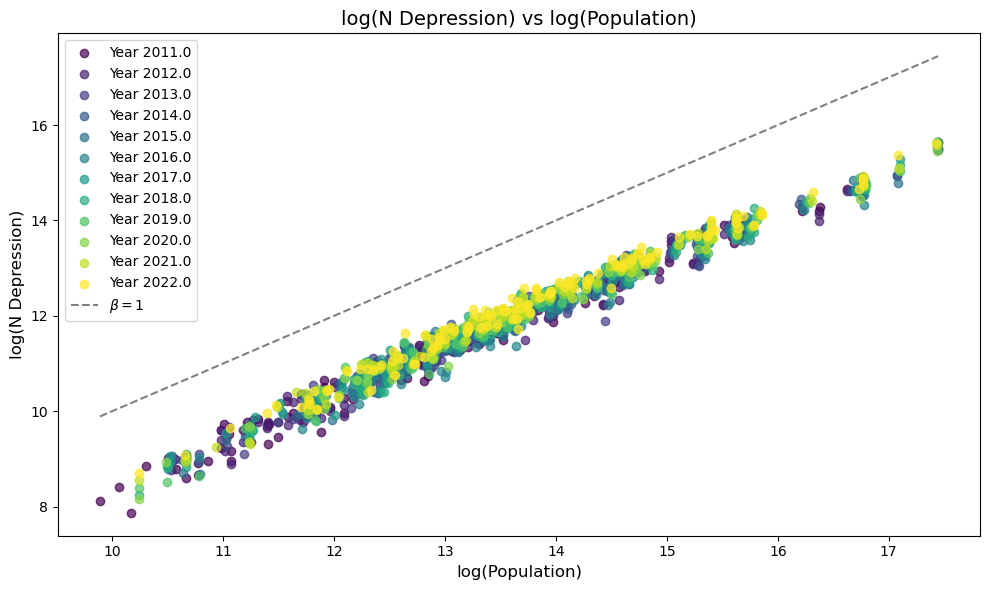

In [6]:
required_columns = ['population', 'Data_value', 'year']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The required columns {required_columns} are missing in the dataset.")

data = data[(data['population'] > 0) & (data['Data_value'] > 0)]

data['Data_value_scaled'] = data['Data_value'] * data['population'] / 100

data['log_population'] = np.log(data['population'])
data['log_depression'] = np.log(data['Data_value_scaled'])

print(data[['population', 'Data_value', 'log_population', 'log_depression']].head())

unique_years = sorted(data['year'].unique())

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))

for i, year in enumerate(unique_years):
    subset = data[data['year'] == year]
    plt.scatter(
        subset['log_population'], subset['log_depression'], 
        color=colors[i], alpha=0.7, label=f"Year {year}"
    )


x = np.linspace(data['log_population'].min(), data['log_population'].max(), 100) # add a reference line with slope 1 (β = 1)
plt.plot(x, x, linestyle='--', color='gray', label=r'$\beta=1$')

plt.xlabel('log(Population)', fontsize=12)
plt.ylabel('log(N Depression)', fontsize=12)
plt.title('log(N Depression) vs log(Population)', fontsize=14)
plt.legend(loc='best')

plt.tight_layout()
plt.show()
